# Práctica 2

In [1]:
# Librerias generales a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Fish Dataset

Este es un dataset sintético generado apartir del paper: Length-weight relationships of nine ﬁsh species from the Tetulia River, southern Bangladesh.

Como metadatos tiene:
- species: nombre de la especie
- length: longitud (cm)
- weight: peso (g)
- w_l_ratio: weight / length

Este dataset se encuentra en [sitio web](https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data/data?select=fish_data.csv)

In [2]:
df = pd.read_csv("fish_data.csv")
print(df.head())

              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


# Limpieza de datos

Se empieza por manejar los outliers, los cuales son los valores que se desvian significativamente de la mayoria de datos perjudicando el analisis y varias tecnicas que puedan usarse sobre los datos.

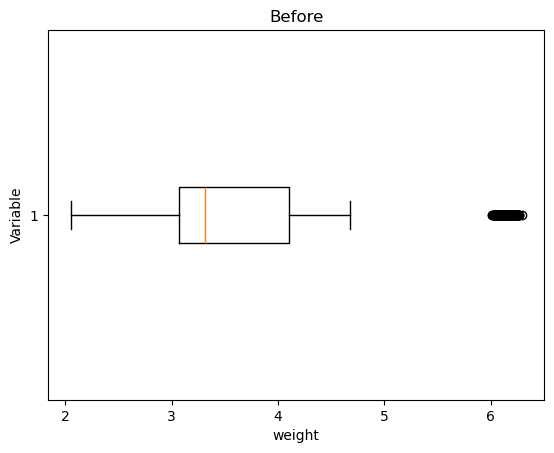

In [3]:
plt.boxplot(df['weight'], vert=False)
plt.ylabel('Variable')
plt.xlabel('weight')
plt.title('Before')
plt.show()

Se puede apreciar que del dataset el weight tiene valores que son outliers.

In [4]:
# calculate summary statistics
mean = df['weight'].mean()
std  = df['weight'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df1 = df[df['weight'] <= upper_bound]

Upper Bound : 5.820604367531265


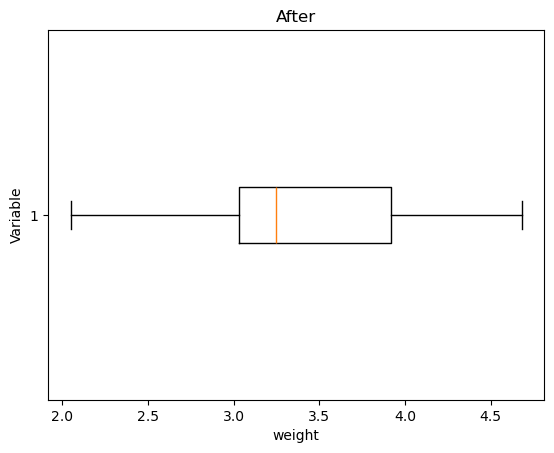

In [5]:
plt.boxplot(df1['weight'], vert=False)
plt.ylabel('Variable')
plt.xlabel('weight')
plt.title('After')
plt.show()

Una vez se aplica un brode superior limite, los datos quedan de mejor manera para ser tratados.

# Reducción de dimensionalidad

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

# Separar características y variable objetivo
X = df1[['length', 'weight', 'w_l_ratio']]
y = df1['species']

# Codificar la variable objetivo (especies) a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

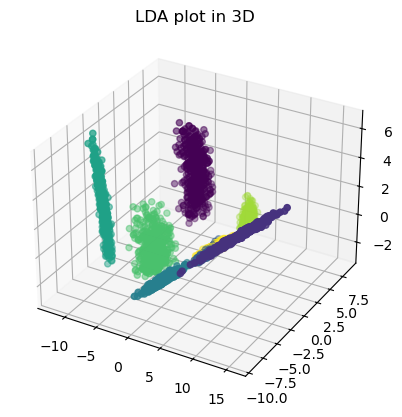

In [7]:
# LDA reducido a 3 dimenciones
X_LDA = LDA(n_components=3).fit_transform(X,y_encoded)

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter3D(X_LDA[:,0], X_LDA[:,1], X_LDA[:,2], c=y_encoded)
plt.title("LDA plot in 3D")

plt.show()

El uso de LDA  permite clasificar los datos y maximiza la separación entre las clases.
Cada color representa una de las 10 especies diferentes del dataset.

In [8]:
# Crear un DataFrame con los resultados de LDA
lda_df = pd.DataFrame(X_LDA)
lda_df['species'] = y

# Mostrar las primeras filas del resultado
lda_df.head()

,0,1,2,species
0,-3.394230,3.720253,-0.779323,Anabas testudineus
1,-3.958013,4.601268,4.022601,Anabas testudineus
2,-4.602699,3.913594,1.598502,Anabas testudineus
3,-4.299912,4.351531,2.779734,Anabas testudineus
4,-2.826541,4.000139,-0.818626,Anabas testudineus


# Selección de características

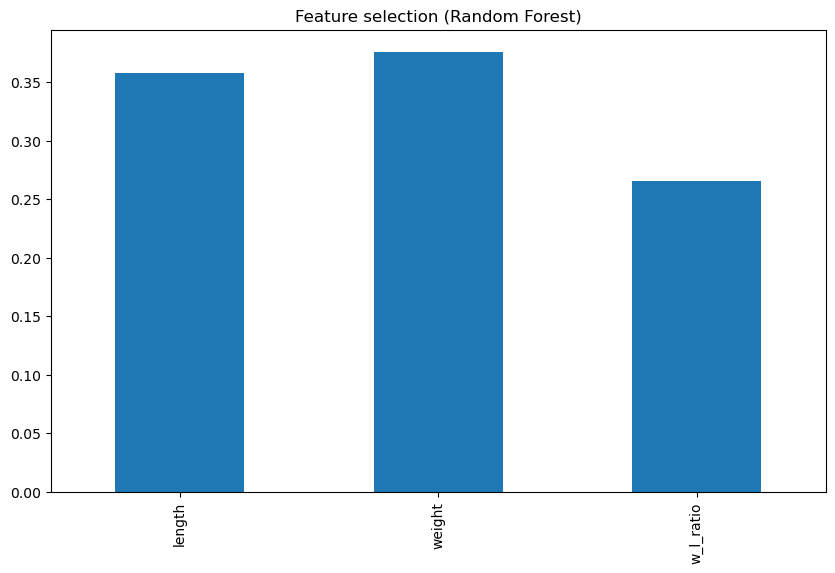

In [9]:
from sklearn.ensemble import RandomForestClassifier

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection (Random Forest)')
plt.show()

Este algoritmo de seleccion de caracterizticas dice que la variable siendo esta la característica mas importante del dataset es weight (peso), superando por muy poco a length.